In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
from tqdm import tqdm
sns.set()

In [2]:
matched_players = pd.read_csv('matched_names.csv')
matched_players = matched_players.drop(['Unnamed: 0'],axis=1)
matched_players.drop_duplicates()
matched_attr = pd.read_csv('matched_attributes.csv')

In [3]:
data = matched_attr.copy()
data = data.drop(['overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)
data = data.astype({'Position':'category'})
data

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,Position
0,26.0,53.0,76.0,76.0,32.0,64.0,44.0,66.0,69.0,65.0,...,68.0,74.0,73.0,7.0,5.0,13.0,13.0,13.0,Adrien Silva,Midfielder
1,74.0,69.0,46.0,79.0,65.0,73.0,73.0,78.0,79.0,73.0,...,56.0,65.0,62.0,11.0,8.0,12.0,11.0,12.0,Ager Aketxe,Midfielder
2,70.0,64.0,46.0,74.0,65.0,67.0,73.0,78.0,68.0,72.0,...,56.0,65.0,62.0,11.0,8.0,12.0,11.0,12.0,Ahmed El Mohamady,Midfielder
3,64.0,63.0,45.0,70.0,64.0,66.0,69.0,76.0,66.0,70.0,...,52.0,56.0,44.0,10.0,7.0,11.0,10.0,11.0,Ahmed Hegazy,Defender
4,64.0,63.0,45.0,70.0,64.0,66.0,69.0,76.0,66.0,70.0,...,52.0,56.0,44.0,10.0,7.0,11.0,10.0,11.0,Ahmed Hegazy,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,33.0,43.0,55.0,36.0,58.0,41.0,30.0,51.0,56.0,...,47.0,53.0,51.0,9.0,8.0,6.0,9.0,8.0,Willian,Midfielder
252,61.0,59.0,47.0,76.0,61.0,71.0,73.0,54.0,76.0,77.0,...,57.0,63.0,56.0,7.0,15.0,12.0,5.0,12.0,Xabier Etxeita,Defender
253,63.0,61.0,50.0,60.0,66.0,70.0,66.0,41.0,56.0,67.0,...,28.0,26.0,35.0,12.0,14.0,8.0,6.0,15.0,Ximo Navarro,Defender
254,61.0,68.0,69.0,86.0,63.0,86.0,81.0,68.0,80.0,84.0,...,65.0,75.0,58.0,12.0,9.0,6.0,14.0,8.0,Yoel Rodriguez,Goalkeeper


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 253 samples in 0.002s...
[t-SNE] Computed neighbors for 253 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 253 / 253
[t-SNE] Mean sigma: 27.836636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.163818
[t-SNE] KL divergence after 1650 iterations: 0.452353


<ipython-input-4-0852f0b8d592>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tsne-2d-one'] = tsne_results[:,0]
<ipython-input-4-0852f0b8d592>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tsne-2d-two'] = tsne_results[:,1]
<ipython-input-4-0852f0b8d592>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

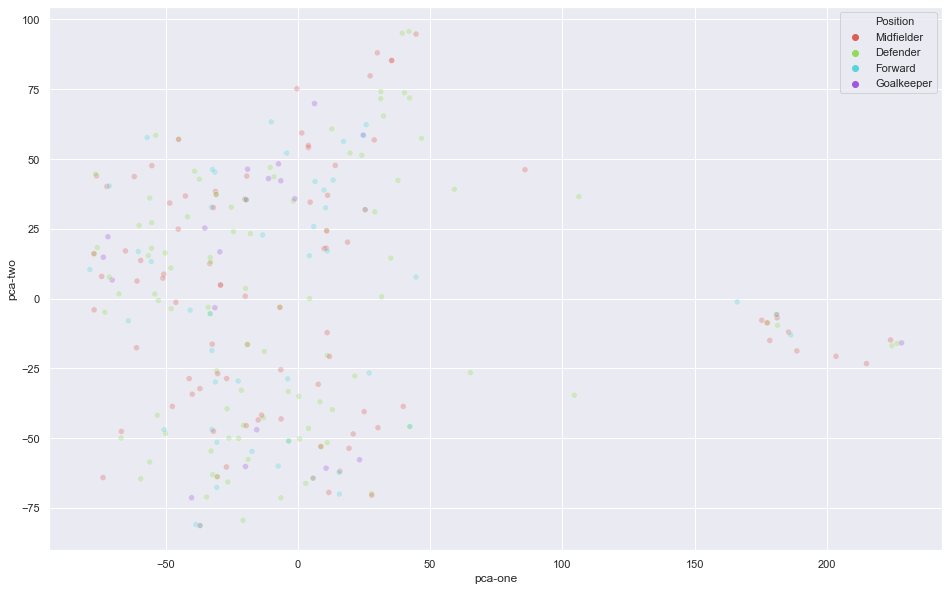

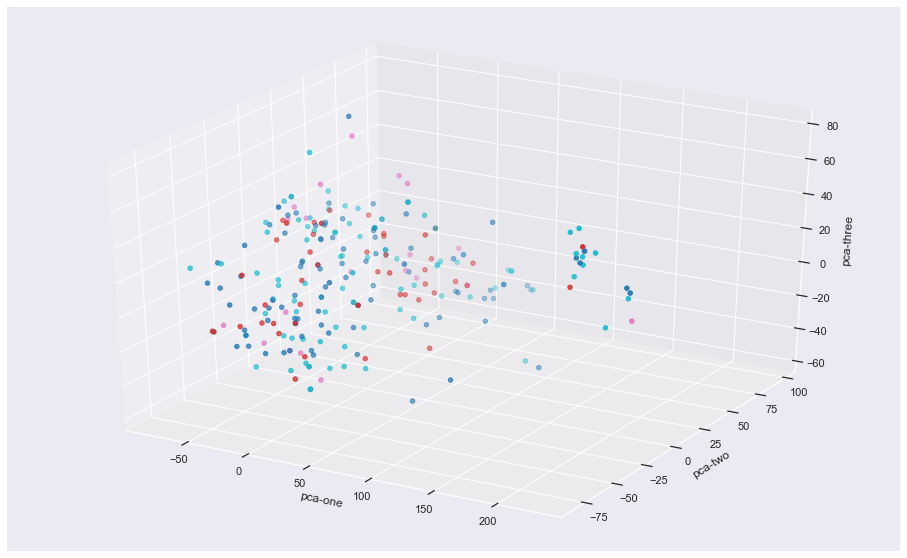

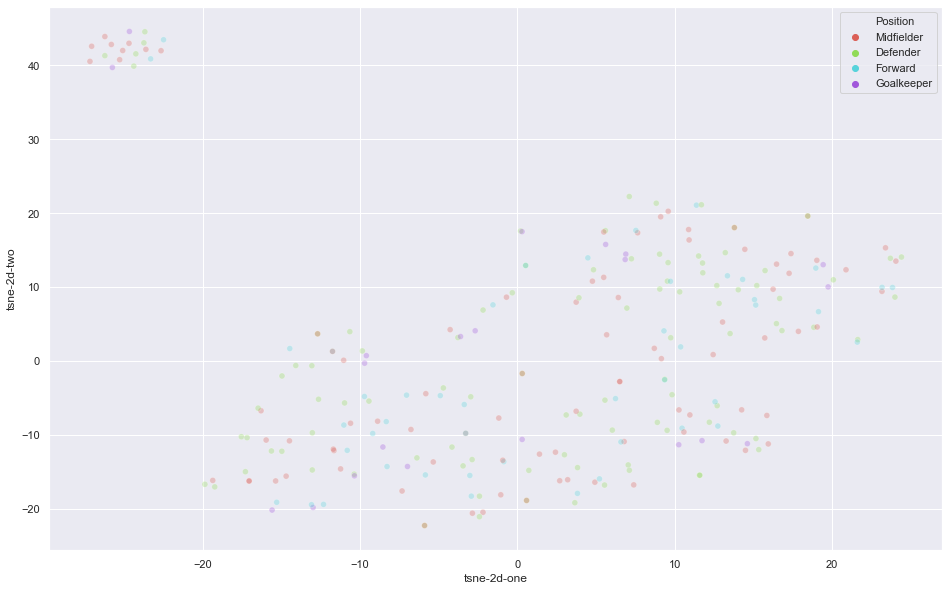

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
data = data.dropna()

X = data.drop(['Position','player_name'],axis=1)
y = data['Position'].cat.codes
#resampling method to generate more data
# sm = SMOTE()
# X_res, y_res = sm.fit_sample(X, y)
# data_res = X_res.copy()
# data_res['Position'] = y_res
# data = data_res

#player_attributes.drop(['date','player_api_id','player_fifa_api_id','id','overall_rating','potential','preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)
data_subset = X.copy()
labels = y.copy()
tsne_results = tsne.fit_transform(data_subset)

data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Position",
    palette=sns.color_palette("hls", 4),
    data=data,
    legend="full",
    alpha=0.3
)

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=data["pca-one"], 
    ys=data["pca-two"], 
    zs=data["pca-three"], 
    c=labels, 
    cmap='tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Position",
    palette=sns.color_palette("hls", 4),
    data=data,
    legend="full",
    alpha=0.3
)

plt.savefig('tsne.png')